## $\bullet \color{red}{\text{ Linear Regression}}$ is a statistical model used to predict the relationship between independent and dependent variables.

$$\color{Blue}{\text{ML}}\rightarrow \color{purple}{\text{ Supervised Learning}}\rightarrow \color{green}{\text{Regression}}\rightarrow \color{red}{\text{ Linear Regression}}\rightarrow\begin{cases}
\textbf{Simple Linear Regression} \\
\textbf{Multiple Linear Regression} \\
\textbf{Polynomial Linear Regression} 
\end{cases}$$



## $\bullet  \textbf{ Model}$ : 
## $$\bullet\quad\hat Y=\color{red}{b}X+\color{green}{a}.$$
## $\bullet\quad\hat Y: $ Predicted values for $Y$.
## $\bullet\quad\color{red}{b}:$ Slope of the line.
## $\bullet\quad\color{green}{a}: $ Coefficient of the line.

## $\bullet\quad$ Y: Dependent variable .
## $\bullet\quad$ X: Independent variable. 

--------------------------



In [57]:
#import some software
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 


In [3]:
#import random data for Y:Dependent variable, X:Independent variable.

data_dic = {
    'X': [1,2,3,4,5] ,
    'Y': [3,4,2,4,5]    
}

df = pd.DataFrame(data_dic)
df


,X,Y
0,1,3
1,2,4
2,3,2
3,4,4
4,5,5


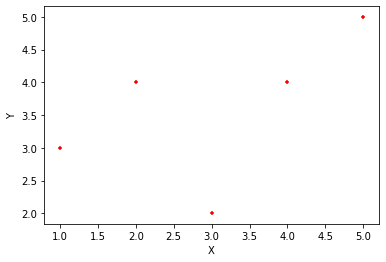

In [10]:
df.plot(kind = 'scatter', x = 'X', y = 'Y', marker = '+', color = 'red')
plt.show()


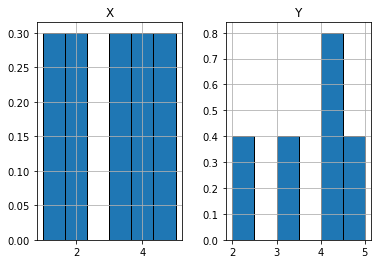

In [22]:
df.hist(edgecolor = 'black', bins = 6, density = True)
plt.show()


In [23]:
df.corr()


,X,Y
X,1.0000,0.5547
Y,0.5547,1.0000


In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       5 non-null      int64
 1   Y       5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


In [25]:
df.mean()


X    3.0
Y    3.6
dtype: float64

In [27]:
Means = list(df.mean())
Means


[3.0, 3.6]

# $$\color{red}{Y} = \textbf{m}\color{blue}{X}+c$$
# $$Est: m  = \sum \cfrac{(X-\bar X)(Y-\bar Y)}{(X-\bar X)^2}$$

In [42]:
new_data_dic = {
    'X': [1,2,3,4,5] ,
    'Y': [3,4,2,4,5] ,
    'X - X_bar' : [x-Means[0] for x in list(df['X']) ],
    'Y - Y_bar' : [y-Means[1] for y in list(df['Y']) ],
    '(X - X_bar)^2' : [(x-Means[0])**2 for x in list(df['X']) ],
    '(X - X_bar)(Y - Y_bar)' : [(x-Means[0])*(y-Means[1]) for (x,y) in zip(list(df['X']),list(df['Y'])) ]
}
new_df = pd.DataFrame(new_data_dic)
new_df


,X,Y,X - X_bar,Y - Y_bar,(X - X_bar)^2,(X - X_bar)(Y - Y_bar)
0,1,3,-2.0,-0.6,4.0,1.2
1,2,4,-1.0,0.4,1.0,-0.4
2,3,2,0.0,-1.6,0.0,-0.0
3,4,4,1.0,0.4,1.0,0.4
4,5,5,2.0,1.4,4.0,2.8


In [47]:
sum1 = new_df['(X - X_bar)^2'].sum()
sum1


10.0

In [48]:
sum2 = new_df['(X - X_bar)(Y - Y_bar)'].sum()
sum2


4.0

In [51]:
m = sum2/sum1
m


0.4

# $$ \bullet\text{ } 3.6 = 0.4 \cdot 3 +c\implies c = 2.4$$

In [53]:
c = Means[1] - m*Means[0]
c


2.4

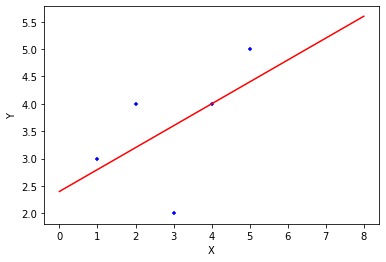

In [132]:
#Υ = lambda x: m*x+c
X = np.linspace(0,8,45)
Y = m*X+c

df.plot(kind = 'scatter', x = 'X', y = 'Y', marker = '+', color = 'blue')
plt.plot(X, Y ,color = 'red')
plt.show()


In [136]:
df


,X,Y
0,1,3
1,2,4
2,3,2
3,4,4
4,5,5


In [137]:
LR_model = lambda x: m*x+c

LR_model(x=1)


2.8

In [144]:
pred = []
for i in range(1,5+1):
    pred.append(LR_model(x=i))
    print(LR_model(x=i)) #preds.
    

2.8
3.2
3.6
4.0
4.4


## $$\bullet\textbf{ MAE}=\cfrac{\sum_{i=1}^n \lvert \hat y_i -y_i\rvert}{n}$$
## $$\bullet\textbf{ RMSE}=\sqrt{\cfrac{\sum_{i=1}^n(\hat y_i -y_i)^2}{n}}$$

In [153]:
y_bar = np.array(pred)
y = np.array(list(df['Y']))    
n = len(y)
MAE = sum(abs(y_bar - y))/n
RMSE = np.sqrt(sum((y_bar - y)**2)/n)


In [193]:
y_bar


array([2.8, 3.2, 3.6, 4. , 4.4])

In [154]:
MAE


0.6399999999999999

In [155]:
RMSE


0.848528137423857

In [190]:
#generalization of the model


In [557]:
class Fit_Linear_Reg:
    y = np.array(list(Y))    
    n = len(y)
    DF = []                                 # input class: numpy arrays. 
    def __init__(self,X,Y=None):     # data: Y:Dependent variable, X:Independent variable.
        self.X = X                   # Goal: predict Y based on X.                                                     
        self.Y = Y
    def __repr__(self):
        return f'LR(X = {self.X}, Y = {self.Y})'
    def __str__(self):
        return f'LR(X = {self.X}, Y = {self.Y})'
    def __add__(self,other):
        return Fit_Linear_Reg(self.X + other.X , self.Y + other.Y)
    def __sub__(self,other):
        return Fit_Linear_Reg(self.X - other.X , self.Y - other.Y)
    def __mul__(self,other):
        return Fit_Linear_Reg(self.X * other.X , self.Y * other.Y)
    
    def train_pred(self):
        Means = [self.X.mean(),self.Y.mean()]
        data_dic = {
            'X': self.X ,
            'Y': self.Y,
            'X - X_bar' : [x-Means[0] for x in list(self.X) ],
            'Y - Y_bar' : [y-Means[1] for y in list(self.Y) ],
            '(X - X_bar)^2' : [(x-Means[0])**2 for x in list(self.X) ],
            '(X - X_bar)(Y - Y_bar)' : [(x-Means[0])*(y-Means[1]) for (x,y) in zip(list(self.X),list(self.Y)) ]
                }
        df = pd.DataFrame(data_dic)
        self.DF.append(df)
        sum1 = df['(X - X_bar)^2'].sum()
        sum2 = df['(X - X_bar)(Y - Y_bar)'].sum()
        m = sum2/sum1
        c = Means[1] - m*Means[0]
        LR_model = lambda x: m*x+c
        
        pred = []
        for i in range(1,5+1):
            pred.append(LR_model(x=i))
            
        y_bar = np.array(pred)
        
        return y_bar

    
    def pred(self,x):
        return LR_model(x)
    
    def MAE(self):
        return sum(abs(y_bar - y))/n
    def RMSE(self):
        return np.sqrt(sum((y_bar - y)**2)/n)
    
    def df(self):
        return self.DF[0]
    

    
model = Fit_Linear_Reg(np.array([1,2,3,4,5]),np.array([3,4,2,4,5]))
#mm = Fit_Linear_Reg(np.array([1,-2,0]),np.array([-2,-1,2]))


In [558]:
model


LR(X = [1 2 3 4 5], Y = [3 4 2 4 5])

In [559]:
model.pred(1)


2.8

In [560]:
model.train_pred()


array([2.8, 3.2, 3.6, 4. , 4.4])

In [561]:
model.pred(10)


6.4

In [562]:
model.RMSE()


0.848528137423857

In [563]:
model.MAE()


0.6399999999999999

In [564]:
model.df()


,X,Y,X - X_bar,Y - Y_bar,(X - X_bar)^2,(X - X_bar)(Y - Y_bar)
0,1,3,-2.0,-0.6,4.0,1.2
1,2,4,-1.0,0.4,1.0,-0.4
2,3,2,0.0,-1.6,0.0,-0.0
3,4,4,1.0,0.4,1.0,0.4
4,5,5,2.0,1.4,4.0,2.8
